# The positive predictive value

## Some Definitions 

* $H_0$ : null hypothesis: The hypotheis that the effect we are testing for is null

* $H_A$ : alternative hypothesis : Not $H_0$, so there is some signal

* $T$ : The random variable that takes value "significant" or "not significant"

* $T_S$ : Value of T when test is significant (eg $T = T_S$)

* $T_N$ : Value of T when test is not significant (eg $T = T_N$)

* $\alpha$ : false positive rate - probability to reject $H_0$ when $H_0$ is true (therefore $H_A$ is false)

* $\beta$ : false negative rate - probability to accept $H_0$ when $H_A$ is true (i.e. $H_0$ is false)


power = $1-\beta$ 

where $\beta$ is the risk of *false negative*

So, to compute power, *we need to know what is the risk of false negative*, ie, the risk to not show a significant effect while we have some signal (null is false).

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as sst

In [2]:
from sympy import symbols, Eq, solve, simplify, lambdify, init_printing, latex
init_printing(use_latex=True, order='old')
from sympy.abc import alpha, beta # get alpha, beta symbolic variables
from IPython.display import HTML
# Code to make HTML for a probability table
def association_table(assocs, title):
    latexed = {'title': title}
    for key, value in assocs.items():
        latexed[key] = latex(value)
    latexed['s_total'] = latex(assocs['t_s'] + assocs['f_s'])
    latexed['ns_total'] = latex(assocs['t_ns'] + assocs['f_ns'])
    return """<h3>{title}</h3>
              <TABLE><TR><TH>$H/T$<TH>$T_S$<TH>$T_N$
              <TR><TH>$H_A$<TD>${t_s}$<TD>${t_ns}$
              <TR><TH>$H_0$<TD>${f_s}$<TD>${f_ns}$
              <TR><TH>Total<TD>${s_total}$<TD>${ns_total}$
              </TABLE>""".format(**latexed)
assoc = dict(t_s = 1 - beta, # H_A true, test significant = true positives
             t_ns = beta, # true, not significant = false negatives
             f_s = alpha, # false, significant = false positives
             f_ns = 1 - alpha) # false, not sigificant = true negatives
HTML(association_table(assoc, 'Not considering prior'))

In [3]:
import scipy.stats as sst
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

## Derivation of Ionannidis / Button positive prediction value : PPV

### Recall some important statistic concepts: Marginalization and Baye theorem

#### Marginalization

$\newcommand{Frac}[2]{\frac{\displaystyle #1}{\displaystyle #2}}$

We now consider that the hypotheses are *random events*, meaning that we can have a probability associated to these events. 

Let's define some new terms:

* $Pr(H_A)$ - prior probability of $H_A$ - probability of $H_A$ before the experiment was conducted.
* $Pr(H_0)$ - prior probability of $H_0$ = $1 - Pr(H_A)$ - probability of null hypothesis before experiment conducted

We are interested in updating the probability of $H_A$ and $H_0$ as a result of a test on some collected data.  This updated probability is $Pr(H_A | T)$ - the probability of $H_A$ given the test  result $T$. $Pr(H_A | T)$ is called the *posterior* probability because it is the probability after the test result.

The marginalization theorem is simply that 

$$ P(A) = \sum_{b_i} P(A,B=b_i) $$

To simplify the notation, we note $P(B=b)$ as $P(b)$

#### Baye theorem

Remembering [Bayes theorem](http://en.wikipedia.org/wiki/Bayes'_theorem#Derivation):

$$P(A, B) = P(A | B) P(B)$$

and therefore

$$P(A | B) = \Frac{P(B, A)}{P(B)} = \Frac{P(B | A) P(A)}{P(B)}$$


Putting these two together we have : 


$$P(A) = \sum_{b_i} P(A|B=b_i) P(B=b_i)$$

Now, apply this to the probability of the test results $T$. The test takes a value either under  $H_A$ or $H_0$.
The probability of a *signficant* result of the test $T=T_S$ is :

$Pr(T=T_S) = P(T_S) = Pr(T_S | H_A) Pr(H_A) + Pr(T_S | H_0) Pr(H_0)$


What is the posterior probability of $H_A$ given that the test is significant?

$P(H_A | T_S) = \Frac{P(T_S | H_A) P(H_A)}{P(T_S)} = \Frac{P(T_S | H_A) P(H_A)}{P(T_S | H_A) Pr(H_A) + Pr(T_S | H_0) Pr(H_0)}$

We have $P(T_S | H_A)$, $P(T_S | H_0)$ from the first column of the table above. Substituting into the equation:

$P(H_A | T_S) = \Frac{(1 - \beta) P(H_A)}{(1 - \beta) P(H_A) + \alpha P(H_0)}$

Defining:

$\pi := Pr(H_A)$, hence: $1 - \pi = Pr(H_0)$

we have:

$P(H_A | T_S) = \Frac{(1 - \beta) \pi}{(1 - \beta) \pi + \alpha (1 - \pi)}$


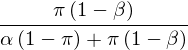

In [4]:
from sympy.abc import pi # get symbolic variable pi
post_prob = (1 - beta) * pi / ((1 - beta) * pi + alpha * (1 - pi))
post_prob

In [5]:
assoc = dict(t_s = pi * (1 - beta),
             t_ns = pi * beta,
             f_s = (1 - pi) * alpha,
             f_ns = (1 - pi) * (1 - alpha))
HTML(association_table(assoc, r'Considering prior $\pi := P(H_A)$'))

## From Button et al. : three messages

### Message 1 : _studies of low power have low probability of detecting an effect_

#### From the definition of power !

### Message 2 :  _studies of low power have low positive predictive value : PPV = P(H1 True | detection)_

Same as Ioannidis - do the derivation starting with odd ratios 

From Button et al., we have the positive predictive value PPV defined as :

$$
PPV = \frac{(1-\beta)R}{(1-\beta)R + \alpha},\textrm{ with } R = P(H_1)/P(H_0) = P_1/P_0 = \pi / (1-\pi)
$$

Hence, 

$$
PPV = \frac{(1-\beta)P_1}{P_0}\frac{P_0}{(1-\beta)P_1 + \alpha P_0} 
$$

$$
= \frac{(1-\beta)P_1}{(1-\beta)P_1 + \alpha P_0} 
$$

$$
= P(H_1, T_S) / P(T_S) = P(H_1 | T_S) 
$$

If we have 4 chances over 5 that $H_0$ is true, and one over five that $H_1$ true, then R = 1/5 / 4/5 = .25. If there's 30% power we have PPV = 50%. So, 50% chance that our result is indeed true. 80% power leads to 80% chance of $H_1$ to be true knowing that we have detected an effect at the $\alpha$ risk of error. 

In [6]:
def PPV(R, Pw, alpha, verbose=True):
    ppv = (Pw * R)/(Pw*R + alph)
    if verbose:
        print("with odd ratio=%3.2f, "
               "power=%3.2f, alpha=%3.2f, "
               "we have PPV=%3.2f" %(R,Pw,alph,ppv))
    return ppv
    

In [7]:
# example from Button et al: P1 = 1/5, P0 = 4/5. R = 1/4
R = 1./4.
Pw = .8
alph = .05
ppv = PPV(R, Pw, alph)

with odd ratio=0.25, power=0.80, alpha=0.05, we have PPV=0.80


In [8]:
# if power is small :
R = 1./4.
Pw = np.arange(.1,1,.2)
alph = .05
for pw in Pw:
    PPV(R, pw, alph)


with odd ratio=0.25, power=0.10, alpha=0.05, we have PPV=0.33
with odd ratio=0.25, power=0.30, alpha=0.05, we have PPV=0.60
with odd ratio=0.25, power=0.50, alpha=0.05, we have PPV=0.71
with odd ratio=0.25, power=0.70, alpha=0.05, we have PPV=0.78
with odd ratio=0.25, power=0.90, alpha=0.05, we have PPV=0.82


### message3 : studies of low power exagerate the effect size of claimed effects

If the power is small, the studies that will find an effect significant will be estimating a stronger effect than the true one. Let's simulate the phenomenon.

In [9]:
from matplotlib.patches import Polygon

def stat_power(n=16, mu=1., sigma=1., alpha=0.05, plot=False, xlen=500):
    """
    This function computes the statistical power of an analysis assuming a normal
    distribution of the data with a one sample t-test
    
    Parameters:
    -----------
    n: int,
        The number of sample in the experiment
    mu: float
        The mean of the alternative
    sigma: float
        The standard deviation of the alternative
    plot: bool
        Plot something
    alpha: float
        The risk of error (type I)
    xlen: int
        Number of points for the display
    
    Returns:
    --------
    float
        The statistical power for this number of sample, mu, sigma, alpha
    """
    df = n-1
    theta = np.sqrt(n)*mu/sigma
    t_alph_null = sst.t.isf(alpha, df)
    ncrv = sst.nct(df, theta)
    spow = 1 - ncrv.cdf(t_alph_null)
    
    if plot:
        # define the domain of the plot
        norv = sst.norm(0, 1.)
        bornesnc = ncrv.isf([0.001, .999])
        bornesn = norv.isf([0.001, .999])
        # because the nc t will have higher max borne, and the H0 normal will be on the left
        x = np.linspace(np.min(bornesn), np.max(bornesnc), xlen)
        t_line = np.zeros_like(x)
        # define the line 
        x_t_line = np.argmin((x-t_alph_null)**2)
        y_t_line = np.max(np.hstack((ncrv.pdf(x), norv.pdf(x))))
        t_line[x_t_line] = y_t_line

        fig, ax = plt.subplots()
        plt.plot(x, ncrv.pdf(x), 'g', x, norv.pdf(x), 'b', x, t_line, 'r')
        
        # Make the shaded region
        # http://matplotlib.org/xkcd/examples/showcase/integral_demo.html
        a = x[x_t_line]; b =  np.max(bornesnc);
        ix = np.linspace(a,b)
        iy = ncrv.pdf(ix)
        verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
        poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
        ax.add_patch(poly)
        
        ax.set_xlabel("t-value - H1 centred on " + r"$\theta $" + " = %4.2f;  " %theta 
                      + r"$\mu$" + " = %4.2f" %mu); 
        ax.set_ylabel("Probability(t)");
        ax.set_title('H0 and H1 sampling densities ' 
                     + r'$\beta$' + '= %3.2f' %spow + ' n = %d' %n)
        plt.show()

    return spow


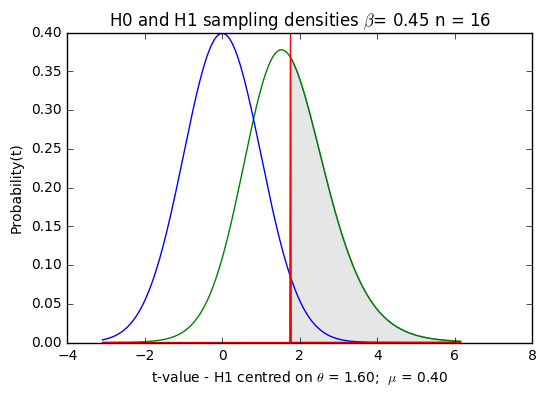

Power :  0.453264099362


In [10]:
n = 16 # number of subjects
sigma = 1.0
mu = .4
alpha = .05
pw = stat_power(n, mu, sigma, alpha=alpha, plot=True)
print("Power : ", pw)

In [11]:
Nexp = 100

norv = sst.norm(0., sigma)
strv = sst.t(n-1)
t_05 = strv.isf(alpha)
sample = norv.rvs(size=(n,1)) + mu
#print np.std(sample)

tval = np.zeros((Nexp,))
effects = np.zeros((Nexp,))
effectsize = np
nb_detection = 0
for e in range(Nexp):
    sample = norv.rvs(size=(n,1)) + mu
    tval[e] = sample.mean()*np.sqrt(n)/np.std(sample, ddof=1)
    effects[e] = sample.mean()/np.std(sample, ddof=1)

relbias = 100*(effects[tval > t_05].mean() - mu)/mu
print("mean effect over experiments : {:.3f} and true : {:.3f}".format(effects.mean(), mu))
print("mean effect estimated when test is significant", effects[tval > t_05].mean())

print("relative bias: %3.2f " % relbias)

estimated_effect = effects[tval > t_05].mean()

mean effect over experiments : 0.428 and true : 0.400
mean effect estimated when test is significant 0.632093160177
relative bias: 58.02 


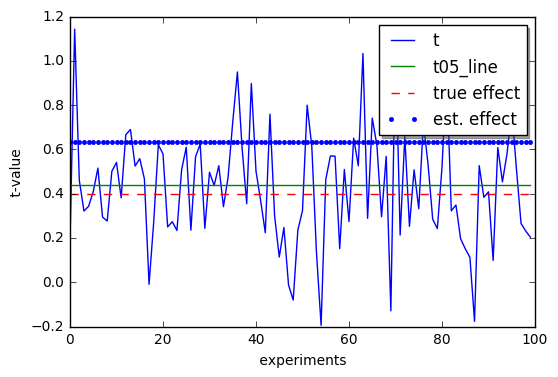

In [12]:
x = range(Nexp)
t05_line = np.ones_like(x)*t_05
true_effect = np.ones_like(x)*mu
est_effect = np.ones_like(x)*estimated_effect

lines = plt.plot(x, effects, 'b-', x, t05_line/np.sqrt(n), 'g-', 
             x, true_effect, 'r--', 
             x, est_effect, 'b.') 
plt.legend( lines, ('t','t05_line', 'true effect', 'est. effect'), 
                   loc='upper right', shadow=True)
plt.xlabel(" experiments ")
plt.ylabel(" t-value ")

In [13]:
from IPython.display import Image as Image

### Another way of seeing the same thing in Button et al, 2013:

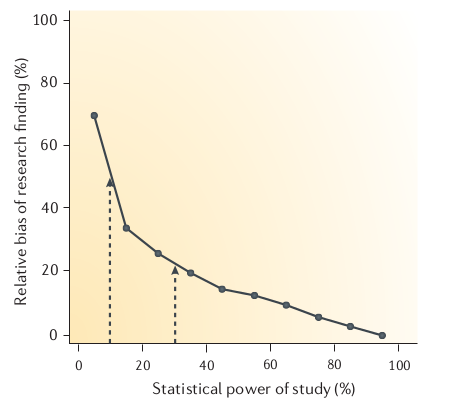

In [14]:
Image('./figures/button_fig5.png')

### Replication should be done with more subjects, not the same amount. 

A graph which I found hard to understand, because in c under the null the variance of the estimated mean should be reduced as well.

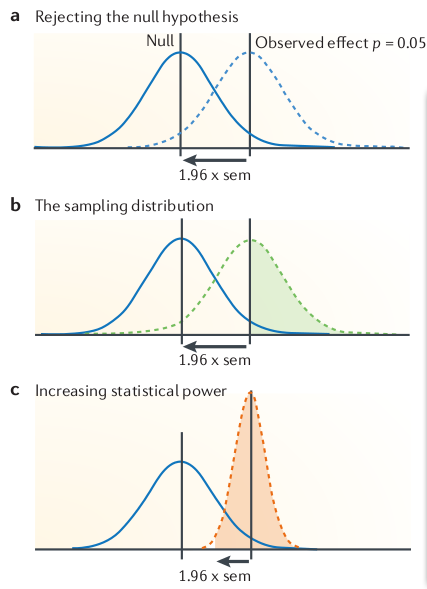

In [15]:
Image('./figures/button_fig1.png')

### Looking at the median power study of 49 Meta analysis : median power of studies in those

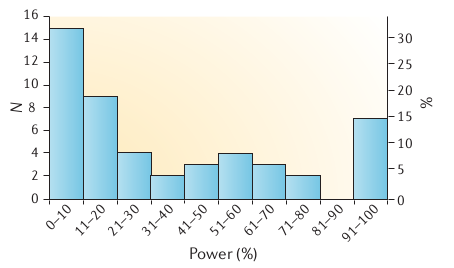

In [16]:
Image('./figures/button_fig2.png')

### Conclusion: Power in neuroscience is a very important issue